### A. Smart Bench Module Simulation

#### 1. NFC-Based User Identification

In [5]:
import pandas as pd
import uuid
import random

# Constants
num_users = 10  # Number of users

# Create an array to store the datasets for each user
users_datasets = []

for user_id in range(1, num_users + 1):
    # Simulate user information
    
    user_name = f"User_{user_id}"
    user_age = random.randint(50, 90)  # Age range
    user_gender = random.choice(['Male', 'Female']) #Gender
    user_height = round(random.uniform(150, 190), 2)  # Height in centimeters
    user_weight = round(random.uniform(50, 90), 2)   # Weight in kilograms

    # Simulate a unique NFC identifier for each user
    nfc_id = str(uuid.uuid4())

    # Create a DataFrame for each user's information
    user_data = pd.DataFrame({
        'User_ID': [user_id],
        'User_Name': [user_name],
        'User_Age': [user_age],
        'User_Gender': [user_gender],
        'User_Height_cm': [user_height],
        'User_Weight_Kg': [user_weight],
        'NFC_ID': [nfc_id]
    })

    users_datasets.append(user_data)

# Combine datasets for all users into a single DataFrame
users_dataset = pd.concat(users_datasets, ignore_index=True)

# Save the user dataset to a CSV file
users_dataset.to_csv('nfc_users_dataset.csv', index=False)

In [6]:
users_dataset

,User_ID,User_Name,User_Age,User_Gender,User_Height_cm,User_Weight_Kg,NFC_ID
0,1,User_1,88,Male,156.25,56.53,19c50d99-b22a-455e-9420-dbdc6ccd7623
1,2,User_2,50,Male,152.47,78.12,05bfb6c6-2252-4209-8e58-3e06b00c1c68
2,3,User_3,63,Female,150.97,63.32,774b9e1e-b666-4ad9-8520-9d68d6a0ed2f
3,4,User_4,59,Male,181.41,89.76,ff9d6787-b67c-4ee0-be06-f7de94baf416
4,5,User_5,78,Female,162.78,81.79,3cd9f993-0aaf-41ec-bff2-309b1a9c1b31
5,6,User_6,72,Female,175.92,57.78,91e2db21-5704-45f9-af3d-74ea59f92bea
6,7,User_7,50,Male,185.12,51.50,4cbc9edf-b24f-4511-8a64-63f418b7b8f1
7,8,User_8,58,Male,185.78,51.17,9576133c-f67a-4d38-b8cf-5461582f2ddd
8,9,User_9,65,Male,164.98,56.54,1fb631e3-1f79-4fd4-81b1-89b89282a3c5
9,10,User_10,62,Female,158.94,77.36,2abe368d-5092-4449-b4e0-88c3659efeda


##### Daily Attendance of users

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Load the NFC users dataset
nfc_users_dataset = pd.read_csv('nfc_users_dataset.csv')

# Constants
num_entries = 1  # Number of entries per user 
consecutive_days_threshold = 3  # Number of consecutive days to be considered a frequent visitor

# Adjusted probability values
probability_yes = 0.6  # Probability of having an entry on the current day
probability_no = 1 - probability_yes  # Probability of not having an entry on the current day

# Create an array to store the datasets for each entry
attendance_datasets = []

for index, user_row in nfc_users_dataset.sample(frac=1).iterrows(): 
    user_id = user_row['User_ID']
    user_name = user_row['User_Name']
    nfc_id = user_row['NFC_ID']

    consecutive_days = 0  # Counter for consecutive days
    for _ in range(num_entries):
        # Simulate random entry date within the last 30 days
        entry_date = datetime.now() - timedelta(days=np.random.randint(1, 30))
        random_time = datetime.strptime(np.random.choice(['09:00', '12:30', '15:45', '18:20', '21:10']), '%H:%M').time()


        # Determine if the user has an entry on the current day
        has_entry = np.random.choice([True, False], p=[probability_yes, probability_no])

        if has_entry:
            # Update consecutive days counter
            consecutive_days += 1
        else:
            # Reset consecutive days counter if no entry on the current day
            consecutive_days = 0

        # Create a DataFrame for each entry
        entry_data = pd.DataFrame({
            'Date': [entry_date.date()],
            'Time': [random_time],
            'User_ID': [user_id],
            'User_Name': [user_name],
            'NFC_ID': [nfc_id],
            'Frequent_Visitor': ['Yes' if consecutive_days > consecutive_days_threshold or consecutive_days == num_entries 
                                 else 'No']
        })

        attendance_datasets.append(entry_data)

# Combine datasets for all entries into a single DataFrame
attendance_dataset = pd.concat(attendance_datasets, ignore_index=True)

# Save the attendance dataset to a CSV file
attendance_dataset.to_csv('attendance_data_with_frequent_visitor.csv', index=False)


In [3]:
attendance_dataset

,Date,Time,User_ID,User_Name,NFC_ID,Frequent_Visitor
0,2024-01-24,09:00:00,7,User_7,4cbc9edf-b24f-4511-8a64-63f418b7b8f1,Yes
1,2024-01-15,12:30:00,10,User_10,2abe368d-5092-4449-b4e0-88c3659efeda,No
2,2024-01-10,09:00:00,5,User_5,3cd9f993-0aaf-41ec-bff2-309b1a9c1b31,Yes
3,2024-01-16,15:45:00,3,User_3,774b9e1e-b666-4ad9-8520-9d68d6a0ed2f,Yes
4,2024-01-13,18:20:00,9,User_9,1fb631e3-1f79-4fd4-81b1-89b89282a3c5,Yes
5,2024-01-07,21:10:00,8,User_8,9576133c-f67a-4d38-b8cf-5461582f2ddd,No
6,2024-01-10,09:00:00,6,User_6,91e2db21-5704-45f9-af3d-74ea59f92bea,No
7,2023-12-29,15:45:00,2,User_2,05bfb6c6-2252-4209-8e58-3e06b00c1c68,No
8,2024-01-14,09:00:00,4,User_4,ff9d6787-b67c-4ee0-be06-f7de94baf416,Yes
9,2024-01-07,09:00:00,1,User_1,19c50d99-b22a-455e-9420-dbdc6ccd7623,No


#### 2. Capture of Sit-to-Stand Exercise Data

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Load the NFC users dataset
nfc_users_dataset = pd.read_csv('nfc_users_dataset.csv')

# Constants
num_exercises = 1  # Number of exercises
exercise_duration = 30  # Duration of exercise in seconds

# Create an array to store the datasets for each exercise
exercise_datasets = []

for index, user_row in nfc_users_dataset.sample(frac=1).iterrows(): 
    user_id = user_row['User_ID']
    user_name = user_row['User_Name']
    nfc_id = user_row['NFC_ID']

    # Simulate multiple exercises for each user
    for _ in range(num_exercises):
        # Simulate random exercise date and time within the last 30 days
        random_date = datetime.now() - timedelta(days=np.random.randint(1, 30))
        random_time = datetime.strptime(np.random.choice(['09:00', '12:30', '15:45', '18:20', '21:10']), '%H:%M').time()

        # Simulate sit-to-stand transitions in a 30-second interval
        sit_stand_transitions = np.random.randint(5, 20)

        # Create a DataFrame for each exercise
        exercise_data = pd.DataFrame({
            'User_ID': [user_id],
            'User_Name': [user_name],
            'NFC_ID': [nfc_id],
            'Date': [random_date.date()],
            'Time': [random_time],
            'Sit_Stand_Transitions_30s': [sit_stand_transitions]
        })

        exercise_datasets.append(exercise_data)

# Combine datasets for all exercises into a single DataFrame
exercise_dataset = pd.concat(exercise_datasets, ignore_index=True)

# Save the exercise dataset to a CSV file
exercise_dataset.to_csv('sit_stand_exercise_data_random.csv', index=False)

In [5]:
exercise_dataset

,User_ID,User_Name,NFC_ID,Date,Time,Sit_Stand_Transitions_30s
0,1,User_1,19c50d99-b22a-455e-9420-dbdc6ccd7623,2024-01-17,15:45:00,18
1,9,User_9,1fb631e3-1f79-4fd4-81b1-89b89282a3c5,2024-01-09,15:45:00,16
2,7,User_7,4cbc9edf-b24f-4511-8a64-63f418b7b8f1,2023-12-29,15:45:00,19
3,3,User_3,774b9e1e-b666-4ad9-8520-9d68d6a0ed2f,2024-01-23,12:30:00,8
4,2,User_2,05bfb6c6-2252-4209-8e58-3e06b00c1c68,2023-12-31,12:30:00,14
5,4,User_4,ff9d6787-b67c-4ee0-be06-f7de94baf416,2024-01-07,15:45:00,12
6,10,User_10,2abe368d-5092-4449-b4e0-88c3659efeda,2024-01-09,18:20:00,7
7,5,User_5,3cd9f993-0aaf-41ec-bff2-309b1a9c1b31,2024-01-25,18:20:00,7
8,8,User_8,9576133c-f67a-4d38-b8cf-5461582f2ddd,2023-12-28,21:10:00,13
9,6,User_6,91e2db21-5704-45f9-af3d-74ea59f92bea,2024-01-02,09:00:00,10


#### 3. Recording Landing Coordinates and Forces:

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Load the NFC users dataset
nfc_users_dataset = pd.read_csv('nfc_users_dataset.csv')

# Constants
num_landings = 1  # Number of landing recordings per user
force_factor_range = (1.5, 3.0)  # Assuming the force generated by foot is between 1.5 and 3 times the body weight
square_side_length = 1  # Assume a square with a side length of 1 meters

# Create an array to store the datasets for each landing
landing_datasets = []

for index, user_row in nfc_users_dataset.sample(frac=1).iterrows():
    user_id = user_row['User_ID']
    user_name = user_row['User_Name']
    nfc_id = user_row['NFC_ID']
    user_weight = user_row['User_Weight_Kg']

    # Simulate multiple landings for each user
    for _ in range(num_landings):
        # Simulate random landing date and time within the last 30 days
        landing_date = datetime.now() - timedelta(days=np.random.randint(1, 30))
        landing_time = datetime.strptime(np.random.choice(['09:00', '12:30', '15:45', '18:20', '21:10']), '%H:%M').time()

        # Simulate landing coordinates within the square
        landing_coordinates_x = np.random.uniform(-square_side_length/2, square_side_length/2)
        landing_coordinates_y = np.random.uniform(-square_side_length/2, square_side_length/2)

        # Multiply the user weight by a factor between 1.5 and 3 to represent landing force
        force_factor = np.random.uniform(*force_factor_range)
        landing_force = user_weight * force_factor

        # Create a DataFrame for each landing
        landing_data = pd.DataFrame({
            'User_ID': [user_id],
            'User_Name': [user_name],
            'NFC_ID': [nfc_id],
            'Date': [landing_date.date()],
            'Time': [landing_time],
            'Landing_Coordinates_X': [landing_coordinates_x],
            'Landing_Coordinates_Y': [landing_coordinates_y],
            'Landing_Forces_Kg': [landing_force]
        })

        landing_datasets.append(landing_data)

# Combine datasets for all landings into a single DataFrame
landing_dataset = pd.concat(landing_datasets, ignore_index=True)

# Save the landing dataset to a CSV file
landing_dataset.to_csv('landing_coordinates_forces_data_with_square.csv', index=False)

In [7]:
landing_dataset

,User_ID,User_Name,NFC_ID,Date,Time,Landing_Coordinates_X,Landing_Coordinates_Y,Landing_Forces_Kg
0,1,User_1,19c50d99-b22a-455e-9420-dbdc6ccd7623,2023-12-28,15:45:00,-0.101215,-0.414727,120.917963
1,5,User_5,3cd9f993-0aaf-41ec-bff2-309b1a9c1b31,2023-12-29,15:45:00,0.465739,0.087476,170.353607
2,10,User_10,2abe368d-5092-4449-b4e0-88c3659efeda,2024-01-24,12:30:00,0.095214,0.269608,224.457882
3,3,User_3,774b9e1e-b666-4ad9-8520-9d68d6a0ed2f,2024-01-14,09:00:00,0.193291,0.001033,130.932352
4,7,User_7,4cbc9edf-b24f-4511-8a64-63f418b7b8f1,2024-01-05,12:30:00,-0.300377,0.211956,90.331768
5,6,User_6,91e2db21-5704-45f9-af3d-74ea59f92bea,2024-01-14,09:00:00,0.132693,0.476784,172.002991
6,2,User_2,05bfb6c6-2252-4209-8e58-3e06b00c1c68,2024-01-08,12:30:00,0.429842,-0.426772,228.140805
7,8,User_8,9576133c-f67a-4d38-b8cf-5461582f2ddd,2024-01-03,21:10:00,0.333673,0.267979,122.961885
8,4,User_4,ff9d6787-b67c-4ee0-be06-f7de94baf416,2024-01-20,15:45:00,0.039899,-0.152515,238.692358
9,9,User_9,1fb631e3-1f79-4fd4-81b1-89b89282a3c5,2024-01-10,15:45:00,0.453024,-0.103929,118.085850


In [8]:
import pandas as pd

# Load the datasets
nfc_users_dataset = pd.read_csv('nfc_users_dataset.csv')
attendance_dataset = pd.read_csv('attendance_data_with_frequent_visitor.csv')
exercise_dataset = pd.read_csv('sit_stand_exercise_data_random.csv')
landing_dataset = pd.read_csv('landing_coordinates_forces_data_with_square.csv')

# Merge the datasets based on User_ID, Date, and Time
merged_dataset = pd.merge(nfc_users_dataset, attendance_dataset, on=['User_ID', 'User_Name', 'NFC_ID'], how='left', 
                          suffixes=('_nfc', '_attendance'))
merged_dataset = pd.merge(merged_dataset, exercise_dataset, on=['User_ID', 'User_Name', 'NFC_ID'], how='left', 
                          suffixes=('_merged', '_exercise'))
merged_dataset = pd.merge(merged_dataset, landing_dataset, on=['User_ID', 'User_Name', 'NFC_ID'], how='left', 
                          suffixes=('_merged', '_landing'))

# Save the merged dataset to a CSV file
merged_dataset.to_csv('smart_bench_combined_dataset.csv', index=False)


In [9]:
merged_dataset

,User_ID,User_Name,User_Age,User_Gender,User_Height_cm,User_Weight_Kg,NFC_ID,Date_merged,Time_merged,Frequent_Visitor,Date_exercise,Time_exercise,Sit_Stand_Transitions_30s,Date,Time,Landing_Coordinates_X,Landing_Coordinates_Y,Landing_Forces_Kg
0,1,User_1,88,Male,156.25,56.53,19c50d99-b22a-455e-9420-dbdc6ccd7623,2024-01-07,09:00:00,No,2024-01-17,15:45:00,18,2023-12-28,15:45:00,-0.101215,-0.414727,120.917963
1,2,User_2,50,Male,152.47,78.12,05bfb6c6-2252-4209-8e58-3e06b00c1c68,2023-12-29,15:45:00,No,2023-12-31,12:30:00,14,2024-01-08,12:30:00,0.429842,-0.426772,228.140805
2,3,User_3,63,Female,150.97,63.32,774b9e1e-b666-4ad9-8520-9d68d6a0ed2f,2024-01-16,15:45:00,Yes,2024-01-23,12:30:00,8,2024-01-14,09:00:00,0.193291,0.001033,130.932352
3,4,User_4,59,Male,181.41,89.76,ff9d6787-b67c-4ee0-be06-f7de94baf416,2024-01-14,09:00:00,Yes,2024-01-07,15:45:00,12,2024-01-20,15:45:00,0.039899,-0.152515,238.692358
4,5,User_5,78,Female,162.78,81.79,3cd9f993-0aaf-41ec-bff2-309b1a9c1b31,2024-01-10,09:00:00,Yes,2024-01-25,18:20:00,7,2023-12-29,15:45:00,0.465739,0.087476,170.353607
5,6,User_6,72,Female,175.92,57.78,91e2db21-5704-45f9-af3d-74ea59f92bea,2024-01-10,09:00:00,No,2024-01-02,09:00:00,10,2024-01-14,09:00:00,0.132693,0.476784,172.002991
6,7,User_7,50,Male,185.12,51.50,4cbc9edf-b24f-4511-8a64-63f418b7b8f1,2024-01-24,09:00:00,Yes,2023-12-29,15:45:00,19,2024-01-05,12:30:00,-0.300377,0.211956,90.331768
7,8,User_8,58,Male,185.78,51.17,9576133c-f67a-4d38-b8cf-5461582f2ddd,2024-01-07,21:10:00,No,2023-12-28,21:10:00,13,2024-01-03,21:10:00,0.333673,0.267979,122.961885
8,9,User_9,65,Male,164.98,56.54,1fb631e3-1f79-4fd4-81b1-89b89282a3c5,2024-01-13,18:20:00,Yes,2024-01-09,15:45:00,16,2024-01-10,15:45:00,0.453024,-0.103929,118.085850
9,10,User_10,62,Female,158.94,77.36,2abe368d-5092-4449-b4e0-88c3659efeda,2024-01-15,12:30:00,No,2024-01-09,18:20:00,7,2024-01-24,12:30:00,0.095214,0.269608,224.457882


##### Clean the dataset

In [10]:
import pandas as pd

# Load the combined dataset
combined_dataset = pd.read_csv('smart_bench_combined_dataset.csv')

# Drop columns
columns_to_drop = ['Date', 'Time', 'Date_exercise', 'Time_exercise']
combined_dataset = combined_dataset.drop(columns=columns_to_drop)

# Rename columns
combined_dataset = combined_dataset.rename(columns={'Date_merged': 'Date', 'Time_merged': 'Time'})

# Save the modified dataset to a new CSV file
combined_dataset.to_csv('smart_bench_combined_dataset_cleaned.csv', index=False)

In [11]:
combined_dataset

,User_ID,User_Name,User_Age,User_Gender,User_Height_cm,User_Weight_Kg,NFC_ID,Date,Time,Frequent_Visitor,Sit_Stand_Transitions_30s,Landing_Coordinates_X,Landing_Coordinates_Y,Landing_Forces_Kg
0,1,User_1,88,Male,156.25,56.53,19c50d99-b22a-455e-9420-dbdc6ccd7623,2024-01-07,09:00:00,No,18,-0.101215,-0.414727,120.917963
1,2,User_2,50,Male,152.47,78.12,05bfb6c6-2252-4209-8e58-3e06b00c1c68,2023-12-29,15:45:00,No,14,0.429842,-0.426772,228.140805
2,3,User_3,63,Female,150.97,63.32,774b9e1e-b666-4ad9-8520-9d68d6a0ed2f,2024-01-16,15:45:00,Yes,8,0.193291,0.001033,130.932352
3,4,User_4,59,Male,181.41,89.76,ff9d6787-b67c-4ee0-be06-f7de94baf416,2024-01-14,09:00:00,Yes,12,0.039899,-0.152515,238.692358
4,5,User_5,78,Female,162.78,81.79,3cd9f993-0aaf-41ec-bff2-309b1a9c1b31,2024-01-10,09:00:00,Yes,7,0.465739,0.087476,170.353607
5,6,User_6,72,Female,175.92,57.78,91e2db21-5704-45f9-af3d-74ea59f92bea,2024-01-10,09:00:00,No,10,0.132693,0.476784,172.002991
6,7,User_7,50,Male,185.12,51.50,4cbc9edf-b24f-4511-8a64-63f418b7b8f1,2024-01-24,09:00:00,Yes,19,-0.300377,0.211956,90.331768
7,8,User_8,58,Male,185.78,51.17,9576133c-f67a-4d38-b8cf-5461582f2ddd,2024-01-07,21:10:00,No,13,0.333673,0.267979,122.961885
8,9,User_9,65,Male,164.98,56.54,1fb631e3-1f79-4fd4-81b1-89b89282a3c5,2024-01-13,18:20:00,Yes,16,0.453024,-0.103929,118.085850
9,10,User_10,62,Female,158.94,77.36,2abe368d-5092-4449-b4e0-88c3659efeda,2024-01-15,12:30:00,No,7,0.095214,0.269608,224.457882


**Visualizations & Insights**

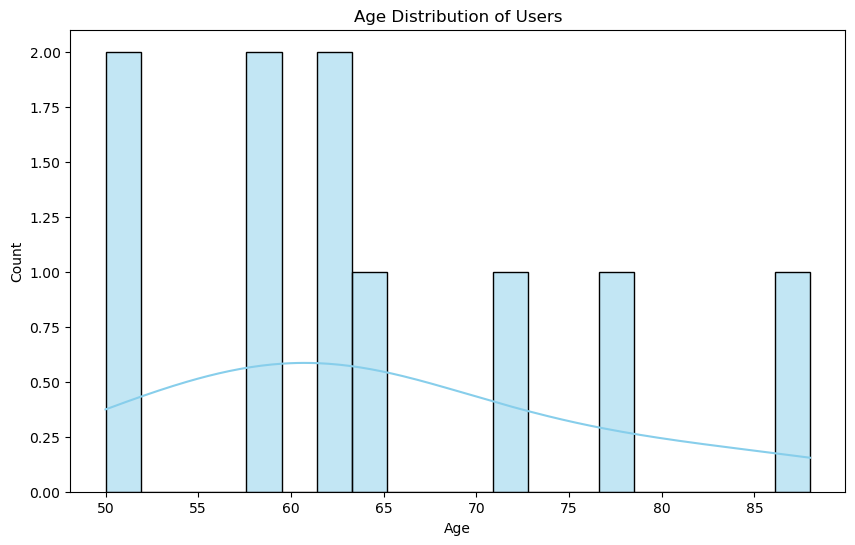

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = pd.read_csv('smart_bench_combined_dataset_cleaned.csv')

# Visualization 1: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='User_Age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

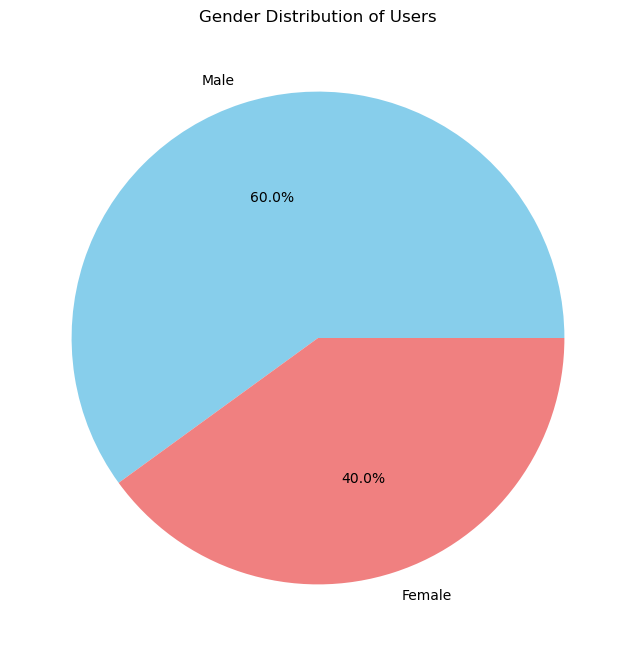

In [13]:
# Visualization 2: Gender Distribution

# Gender Distribution
gender_distribution = combined_dataset['User_Gender'].value_counts()

# Plotting Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution of Users')
plt.show()


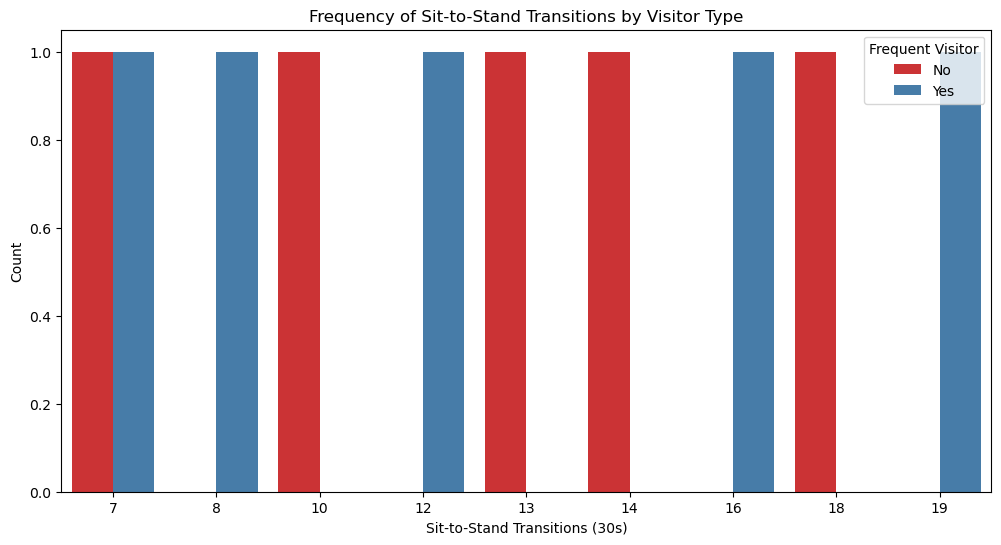

In [14]:
# Visualization 3: Frequency of Sit-to-Stand Transitions
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='Sit_Stand_Transitions_30s', hue='Frequent_Visitor', palette='Set1')
plt.title('Frequency of Sit-to-Stand Transitions by Visitor Type')
plt.xlabel('Sit-to-Stand Transitions (30s)')
plt.ylabel('Count')
plt.legend(title='Frequent Visitor', loc='upper right')
plt.show()

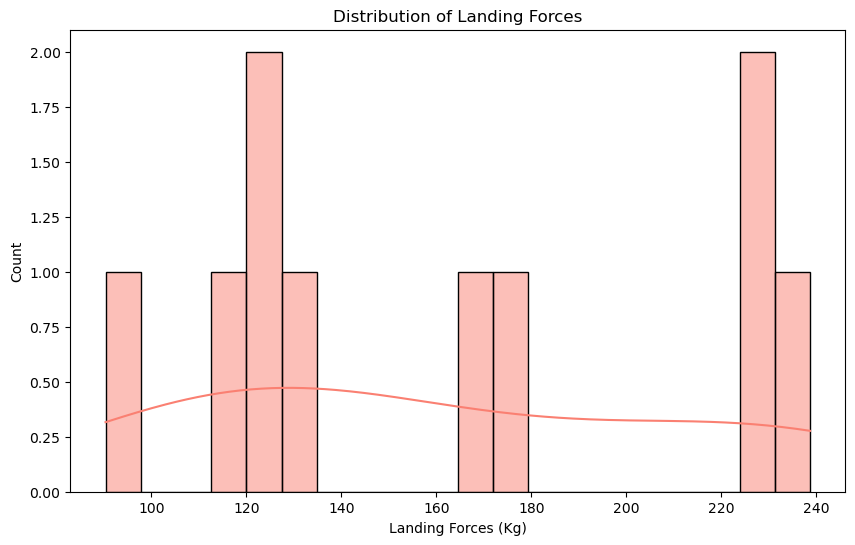

In [15]:
# Visualization 4: Landing Forces Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Landing_Forces_Kg', bins=20, kde=True, color='salmon')
plt.title('Distribution of Landing Forces')
plt.xlabel('Landing Forces (Kg)')
plt.ylabel('Count')
plt.show()

In [16]:
# Load the modified combined dataset
dataset = pd.read_csv('smart_bench_combined_dataset_cleaned.csv')

# Data Wrangling

# 1. Average Age by Gender
average_age_by_gender = dataset.groupby('User_Gender')['User_Age'].mean().reset_index()
average_age_by_gender.columns = ['User_Gender', 'Average Age']

# 2. Average Sit-to-Stand Transitions by Visitor Type
average_transitions_by_visitor = dataset.groupby('Frequent_Visitor')['Sit_Stand_Transitions_30s'].mean().reset_index()
average_transitions_by_visitor.columns = ['Frequent_Visitor', 'Average Sit-to-Stand Transitions']

# 3. Average Landing Forces by Visitor Type
average_forces_by_visitor = dataset.groupby('Frequent_Visitor')['Landing_Forces_Kg'].mean().reset_index()
average_forces_by_visitor.columns = ['Frequent_Visitor', 'Average Landing Forces (Kg)']

In [17]:
# Load the modified combined dataset
dataset = pd.read_csv('smart_bench_combined_dataset_cleaned.csv')

# Data Wrangling

# Group by Gender, Age, and Frequent Visitor
grouped_data = dataset.groupby(['User_Gender', 'User_Age', 'Frequent_Visitor']).agg({
    'Sit_Stand_Transitions_30s': 'mean',
    'Landing_Forces_Kg': 'mean'
}).reset_index()

# Rename columns for clarity
grouped_data.columns = ['User_Gender', 'User_Age', 'Frequent_Visitor', 'Average Sit-to-Stand Transitions', 'Average Landing Forces (Kg)']

# Display results in tabular format
print("\nGrouped Data by Gender, Age, and Frequent Visitor:\n")
grouped_data


Grouped Data by Gender, Age, and Frequent Visitor:



,User_Gender,User_Age,Frequent_Visitor,Average Sit-to-Stand Transitions,Average Landing Forces (Kg)
0,Female,62,No,7.0,224.457882
1,Female,63,Yes,8.0,130.932352
2,Female,72,No,10.0,172.002991
3,Female,78,Yes,7.0,170.353607
4,Male,50,No,14.0,228.140805
5,Male,50,Yes,19.0,90.331768
6,Male,58,No,13.0,122.961885
7,Male,59,Yes,12.0,238.692358
8,Male,65,Yes,16.0,118.085850
9,Male,88,No,18.0,120.917963


In [20]:
# Visualization: Average Sit-to-Stand Transitions and Landing Forces by Gender, Age, and Frequent Visitor using Plotly

import plotly.express as px

# Plot Average Sit-to-Stand Transitions
fig1 = px.bar(grouped_data, x='User_Age', y='Average Sit-to-Stand Transitions', color='Frequent_Visitor',
              title='Average Sit-to-Stand Transitions by Age, Gender, and Frequent Visitor',
              labels={'User_Age': 'User Age', 'Average Sit-to-Stand Transitions': 'Average Transitions'})

# Plot Average Landing Forces
fig2 = px.bar(grouped_data, x='User_Age', y='Average Landing Forces (Kg)', color='Frequent_Visitor',
              title='Average Landing Forces by Age, Gender, and Frequent Visitor',
              labels={'User_Age': 'User Age', 'Average Landing Forces (Kg)': 'Average Forces (Kg)'})

# Show plots
fig1.show()
fig2.show()


In [19]:
# Visualization: Heatmap of Landing Coordinates with Corresponding Force Values using Plotly

import plotly.express as px

# Create a heatmap of landing coordinates with corresponding force values
fig_heatmap = px.scatter(dataset, x='Landing_Coordinates_X', y='Landing_Coordinates_Y',
                         size='Landing_Forces_Kg', color='Sit_Stand_Transitions_30s',
                         title='Heatmap of Landing Coordinates with Corresponding Force Values',
                         labels={'Landing_Coordinates_X': 'Landing Coordinates X',
                                 'Landing_Coordinates_Y': 'Landing Coordinates Y',
                                 'Landing_Forces_Kg': 'Landing Forces (Kg)',
                                 'Sit_Stand_Transitions_30s': 'Sit-to-Stand Transitions'})

# Show heatmap
fig_heatmap.show()


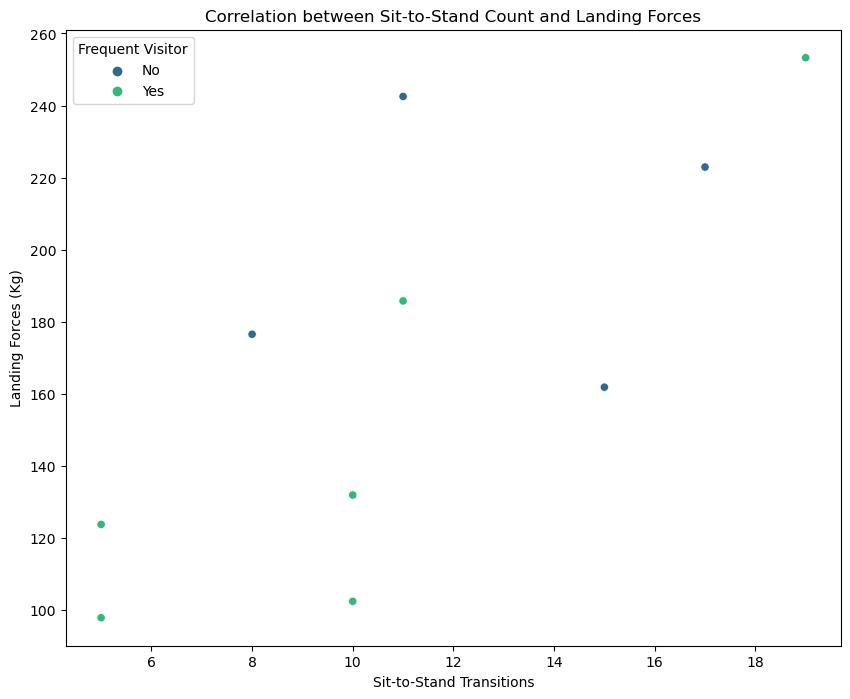

In [80]:
# Visualization: Correlation between Sit-to-Stand Count and Landing Forces using Seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot to show the correlation
plt.figure(figsize=(10, 8))
sns.scatterplot(data=dataset, x='Sit_Stand_Transitions_30s', y='Landing_Forces_Kg', hue='Frequent_Visitor', palette='viridis')
plt.title('Correlation between Sit-to-Stand Count and Landing Forces')
plt.xlabel('Sit-to-Stand Transitions')
plt.ylabel('Landing Forces (Kg)')
plt.legend(title='Frequent Visitor')
plt.show()


In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Load the NFC users dataset
nfc_users_dataset = pd.read_csv('nfc_users_dataset.csv')

# Create a dataset for 10 users 
np.random.seed(42)  

# Constants
num_users = 10
num_measurements = 1

# Generate synthetic data
user_ids = np.arange(1, num_users + 1)
nfc_ids = nfc_users_dataset['NFC_ID'].sample(num_users).tolist()  # Match NFC IDs with the provided dataset
speeds = np.random.uniform(1.0, 2.5, num_users)
step_lengths = np.random.uniform(0.5, 1.2, num_users)
stride_lengths = speeds * np.random.uniform(1.2, 1.5, num_users)
cadences = np.random.uniform(80, 120, num_users)  # Steps per minute
double_support_times = np.random.uniform(0.1, 0.3, num_users)  # Percentage of gait cycle
step_times = 60 / cadences  # Time per step in seconds

# Generate dates and times for the measurements (within the past month)
start_date = datetime.now() - timedelta(days=30)
measurement_dates = [start_date + timedelta(days=i) for i in range(num_measurements)]
measurement_times = [start_date + timedelta(minutes=i) for i in range(num_measurements * num_users)]

# Create the gait dynamics dataset
gait_data = pd.DataFrame({
    'User_ID': np.repeat(user_ids, num_measurements),
    'User_Name': np.repeat(nfc_users_dataset.loc[nfc_users_dataset['NFC_ID'].isin(nfc_ids), 'User_Name'].tolist(), 
                           num_measurements),
    'NFC_ID': np.repeat(nfc_ids, num_measurements),
    'Date': np.tile([d.date() for d in measurement_dates], num_users),
    'Time': [t.time().strftime('%H:%M:%S') for t in measurement_times],
    'Speed_m_s': np.repeat(speeds, num_measurements),
    'Step_Length_m': np.repeat(step_lengths, num_measurements),
    'Stride_Length_m': np.repeat(stride_lengths, num_measurements),
    'Cadence_steps_min': np.repeat(cadences, num_measurements),
    'Double_Support_Time_percent': np.repeat(double_support_times, num_measurements),
    'Step_Time_sec': np.repeat(step_times, num_measurements) 
})

# Correct NFC_IDs based on User_Name
gait_data['NFC_ID'] = gait_data['User_Name'].map(nfc_users_dataset.set_index('User_Name')['NFC_ID'])

gait_data.to_csv('Gait_Dynamics.csv', index=False)

# Display the corrected gait_data
gait_data

,User_ID,User_Name,NFC_ID,Date,Time,Speed_m_s,Step_Length_m,Stride_Length_m,Cadence_steps_min,Double_Support_Time_percent,Step_Time_sec
0,1,User_1,19c50d99-b22a-455e-9420-dbdc6ccd7623,2023-12-24,13:50:17,1.233992,0.628383,1.771460,112.335894,0.232504,0.534112
1,2,User_2,05bfb6c6-2252-4209-8e58-3e06b00c1c68,2023-12-24,13:51:17,1.087125,0.712970,1.369672,92.184551,0.162342,0.650868
2,3,User_3,774b9e1e-b666-4ad9-8520-9d68d6a0ed2f,2023-12-24,13:52:17,2.299264,0.867330,3.113825,83.906885,0.204014,0.715078
3,4,User_4,ff9d6787-b67c-4ee0-be06-f7de94baf416,2023-12-24,13:53:17,1.901673,0.802362,2.619981,107.369321,0.209342,0.558819
4,5,User_5,3cd9f993-0aaf-41ec-bff2-309b1a9c1b31,2023-12-24,13:54:17,2.062109,0.703860,2.503266,97.606100,0.136971,0.614716
5,6,User_6,91e2db21-5704-45f9-af3d-74ea59f92bea,2023-12-24,13:55:17,1.030877,0.928297,1.424943,84.881529,0.293917,0.706868
6,7,User_7,4cbc9edf-b24f-4511-8a64-63f418b7b8f1,2023-12-24,13:56:17,2.454865,0.597646,3.071422,99.807076,0.255027,0.601160
7,8,User_8,9576133c-f67a-4d38-b8cf-5461582f2ddd,2023-12-24,13:57:17,2.248664,0.704501,2.742281,81.375541,0.287900,0.737322
8,9,User_9,1fb631e3-1f79-4fd4-81b1-89b89282a3c5,2023-12-24,13:58:17,1.318509,0.756453,1.957545,116.372816,0.278965,0.515584
9,10,User_10,2abe368d-5092-4449-b4e0-88c3659efeda,2023-12-24,13:59:17,1.272737,0.819249,1.895984,90.351199,0.219580,0.664075


In [1]:
import pandas as pd

# Assuming you have the gait_data DataFrame
# Replace the following line with actual code to load your gait_data
gait_data = pd.read_csv('Gait_Dynamics.csv')

# 1. Overall Statistics
average_speed = gait_data['Speed_m_s'].mean()
average_step_length = gait_data['Step_Length_m'].mean()
average_stride_length = gait_data['Stride_Length_m'].mean()
average_cadence = gait_data['Cadence_steps_min'].mean()
average_double_support_time = gait_data['Double_Support_Time_percent'].mean()
average_step_time = gait_data['Step_Time_sec'].mean()

overall_statistics = pd.DataFrame({
    'Metric': ['Average Speed', 'Average Step Length', 'Average Stride Length', 'Average Cadence',
               'Average Double Support Time', 'Average Step Time'],
    'Value': [average_speed, average_step_length, average_stride_length, average_cadence,
              average_double_support_time, average_step_time]
})

# 2. User-Specific Insights - Max Speed
user_max_speed = gait_data.groupby(['User_ID', 'User_Name'])['Speed_m_s'].max().reset_index()
user_max_speed.columns = ['User_ID', 'User_Name', 'Max_Speed_m_s']

# 3. User-Specific Insights - Min Step Length
user_min_step_length = gait_data.groupby(['User_ID', 'User_Name'])['Step_Length_m'].min().reset_index()
user_min_step_length.columns = ['User_ID', 'User_Name', 'Min_Step_Length_m']

In [89]:
import pandas as pd

# Assuming you have the gait_data DataFrame
# Replace the following line with actual code to load your gait_data
gait_data = pd.read_csv('Gait_Dynamics.csv')

# Define the aggregation functions
agg_functions = {
    'Speed_m_s': ['mean', 'max', 'min'],
    'Step_Length_m': ['mean', 'max', 'min'],
    'Stride_Length_m': ['mean', 'max', 'min'],
    'Cadence_steps_min': ['mean', 'max', 'min'],
    'Double_Support_Time_percent': ['mean', 'max', 'min'],
    'Step_Time_sec': ['mean', 'max', 'min']
}

# Group by User_ID and User_Name and apply the aggregation functions
user_statistics = gait_data.groupby(['User_ID', 'User_Name']).agg(agg_functions).reset_index()

# Flatten the multi-level columns
user_statistics.columns = ['{}_{}'.format(col[0], col[1]) if col[1] != '' else col[0] for col in user_statistics.columns]

# Display the user statistics DataFrame
user_statistics
user_statistics.to_csv('user_statistics.csv', index=False)


In [90]:
import plotly.figure_factory as ff

# Calculate correlation matrix
correlation_matrix = gait_data[['Speed_m_s', 'Step_Length_m', 'Stride_Length_m', 'Cadence_steps_min',
                                'Double_Support_Time_percent', 'Step_Time_sec']].corr()

fig = ff.create_annotated_heatmap(z=correlation_matrix.values,
                                  x=list(correlation_matrix.columns),
                                  y=list(correlation_matrix.index),
                                  colorscale='Viridis',
                                  annotation_text=correlation_matrix.round(2).values,
                                  showscale=True)
fig.update_layout(title='Correlation Heatmap')
fig.show()


In [8]:
import plotly.express as px

fig = px.scatter_3d(gait_data, x='Step_Length_m', y='Stride_Length_m', z='Cadence_steps_min',
                    color='User_Name', title='3D Scatter Plot for Gait Dynamics Metrics')
fig.update_layout(scene=dict(xaxis_title='Step Length (m)',
                             yaxis_title='Stride Length (m)',
                             zaxis_title='Cadence (steps/min)'))
fig.show()


In [69]:
import pandas as pd
import numpy as np

# Constants
num_users = 10
num_measurements = 1

# Generate synthetic data for handrail reliance evaluation
np.random.seed(42)

user_ids = np.tile(np.arange(1, num_users + 1), num_measurements)
user_names = np.repeat(['User_' + str(i) for i in range(1, num_users + 1)], num_measurements)
timestamps = pd.date_range('2023-12-24', periods=num_users * num_measurements, freq='5T')


# Simulate activation duration (in seconds) for handrail reliance (adjusted range: 10 to 60 seconds)
activation_duration = np.random.uniform(low=7.0, high=80.0, size=num_users * num_measurements)

# Simulate frequently used sides ('Left' or 'Right')
frequently_used_sides = np.random.choice(['Left', 'Right'], size=num_users * num_measurements)

# Simulate handrail pressure
handrail_pressure = np.random.uniform(low=5.0, high=25.0, size=num_users * num_measurements)

# Simulate grip type ('Full Grip' or 'Fingertips')
grip_type = np.random.choice(['Full Grip', 'Fingertips'], size=num_users * num_measurements)

# Simulate hand orientation ('Vertical' or 'Horizontal')
hand_orientation = np.random.choice(['Vertical', 'Horizontal'], size=num_users * num_measurements)

# Create the dataset
handrail_dataset = pd.DataFrame({
    'User_ID': user_ids,
    'User_Name': user_names,
    'Timestamp': timestamps,
    'Activation_Duration_sec': activation_duration,
    'Frequently_Used_Side': frequently_used_sides,
    'Handrail_Pressure': handrail_pressure,
    'Grip_Type': grip_type,
    'Hand_Orientation': hand_orientation,
})

# Convert 'Timestamp' column to object type
handrail_dataset['Timestamp'] = handrail_dataset['Timestamp'].astype(str)

handrail_dataset['Reliance_Category'] = pd.cut(handrail_dataset['Activation_Duration_sec'],
                                               bins=[-np.inf, 10, 30, 60, np.inf],
                                               labels=['No Support', 'Low Support', 'Moderate Support', 'High Support'])

handrail_dataset.to_csv('Handrail_Reliance.csv', index=False)

# Display the first few rows of the dataset
handrail_dataset


,User_ID,User_Name,Timestamp,Activation_Duration_sec,Frequently_Used_Side,Handrail_Pressure,Grip_Type,Hand_Orientation,Reliance_Category
0,1,User_1,2023-12-24 00:00:00,34.341429,Right,8.668090,Full Grip,Vertical,Moderate Support
1,2,User_2,2023-12-24 00:05:00,76.402144,Left,11.084845,Fingertips,Vertical,High Support
2,3,User_3,2023-12-24 00:10:00,60.435558,Right,15.495129,Full Grip,Vertical,High Support
3,4,User_4,2023-12-24 00:15:00,50.702069,Right,13.638900,Fingertips,Vertical,Moderate Support
4,5,User_5,2023-12-24 00:20:00,18.389361,Right,10.824583,Full Grip,Vertical,Low Support
5,6,User_6,2023-12-24 00:25:00,18.387600,Right,17.237058,Fingertips,Horizontal,Low Support
6,7,User_7,2023-12-24 00:30:00,11.240104,Right,7.789877,Fingertips,Horizontal,Low Support
7,8,User_8,2023-12-24 00:35:00,70.230859,Right,10.842893,Full Grip,Vertical,High Support
8,9,User_9,2023-12-24 00:40:00,50.881396,Right,12.327237,Full Grip,Horizontal,Moderate Support
9,10,User_10,2023-12-24 00:45:00,58.689298,Right,14.121400,Full Grip,Horizontal,Moderate Support


In [70]:
# Insights
average_duration_per_user = handrail_dataset.groupby('User_ID')['Activation_Duration_sec'].mean()
most_common_grip_type = handrail_dataset['Grip_Type'].mode().iloc[0]
reliance_counts = handrail_dataset['Reliance_Category'].value_counts()

# Visualization 1: Average Activation Duration per User
fig1 = px.bar(average_duration_per_user.reset_index(), x='User_ID', y='Activation_Duration_sec',
              title='Average Activation Duration per User',
              labels={'Activation_Duration_sec': 'Average Duration (sec)'},
              color='User_ID')  # Different color for each user

# Visualization 2: Distribution of Grip Types
fig2 = px.pie(handrail_dataset, names='Grip_Type', title='Distribution of Grip Types',
              color='Grip_Type')  # Different color for each grip type

# Visualization 3: Support Level Distribution
fig3 = px.bar(reliance_counts.reset_index(), x='index', y='Reliance_Category',
              title='Distribution of Support Levels',
              labels={'Reliance_Category': 'Count', 'index': 'Support Level'},
              color='index')  # Different color for each support level

# Show Visualizations
fig1.show()
fig2.show()
fig3.show()

In [71]:
average_pressure_per_grip = handrail_dataset.groupby('Grip_Type')['Handrail_Pressure'].mean()
hand_orientation_distribution = handrail_dataset['Hand_Orientation'].value_counts()
total_duration_per_side = handrail_dataset.groupby('Frequently_Used_Side')['Activation_Duration_sec'].sum().reset_index()

# Visualization 4: Average Handrail Pressure per Grip Type
fig4 = px.bar(average_pressure_per_grip.reset_index(), x='Grip_Type', y='Handrail_Pressure',
              title='Average Handrail Pressure per Grip Type',
              labels={'Handrail_Pressure': 'Average Pressure'},
              color='Grip_Type', color_discrete_sequence=px.colors.qualitative.Set1)

# Visualization 5: Distribution of Hand Orientations
fig5 = px.pie(handrail_dataset, names='Hand_Orientation',
              title='Distribution of Hand Orientations',
              labels={'Hand_Orientation': 'Count'},
              color='Hand_Orientation', color_discrete_sequence=px.colors.qualitative.Set2)

# Visualization 6: Total Activation Duration per Frequently Used Side
fig6 = px.bar(total_duration_per_side.reset_index(), x='Frequently_Used_Side', y='Activation_Duration_sec',
              title='Total Activation Duration per Frequently Used Side',
              labels={'Activation_Duration_sec': 'Total Duration (sec)'},
              color='Frequently_Used_Side', color_discrete_sequence=px.colors.qualitative.Set3)

# Visualization 7: Correlation 


fig7 = px.scatter(handrail_dataset, x='Activation_Duration_sec', y='Handrail_Pressure',
                         trendline="ols",  # Ordinary Least Squares regression line
                         title='Scatter Plot of Activation Duration vs. Handrail Pressure',
                         labels={'Activation_Duration_sec': 'Activation Duration (sec)',
                                 'Handrail_Pressure': 'Handrail Pressure'},
                         color_discrete_sequence=px.colors.qualitative.Set1)

In [72]:
# Show Visualizations
fig4.show()

In [73]:
fig5.show()

In [74]:
fig6.show()

In [76]:
fig7.show()

In [77]:
# Merge handrail_dataset and gait_data on common columns
Smart_path_merged_data = pd.merge(handrail_dataset, gait_data, on=['User_ID', 'User_Name'])
Smart_path_merged_data = Smart_path_merged_data.drop(['Date', 'Time'], axis=1)

# Save the merged dataset to a CSV file
Smart_path_merged_data.to_csv('Smart_Path_Merged_Data.csv', index=False)

# Display the merged dataset
Smart_path_merged_data


,User_ID,User_Name,Timestamp,Activation_Duration_sec,Frequently_Used_Side,Handrail_Pressure,Grip_Type,Hand_Orientation,Reliance_Category,NFC_ID,Speed_m_s,Step_Length_m,Stride_Length_m,Cadence_steps_min,Double_Support_Time_percent,Step_Time_sec
0,1,User_1,2023-12-24 00:00:00,34.341429,Right,8.668090,Full Grip,Vertical,Moderate Support,19c50d99-b22a-455e-9420-dbdc6ccd7623,1.233992,0.628383,1.771460,112.335894,0.232504,0.534112
1,2,User_2,2023-12-24 00:05:00,76.402144,Left,11.084845,Fingertips,Vertical,High Support,05bfb6c6-2252-4209-8e58-3e06b00c1c68,1.087125,0.712970,1.369672,92.184551,0.162342,0.650868
2,3,User_3,2023-12-24 00:10:00,60.435558,Right,15.495129,Full Grip,Vertical,High Support,774b9e1e-b666-4ad9-8520-9d68d6a0ed2f,2.299264,0.867330,3.113825,83.906885,0.204014,0.715078
3,4,User_4,2023-12-24 00:15:00,50.702069,Right,13.638900,Fingertips,Vertical,Moderate Support,ff9d6787-b67c-4ee0-be06-f7de94baf416,1.901673,0.802362,2.619981,107.369321,0.209342,0.558819
4,5,User_5,2023-12-24 00:20:00,18.389361,Right,10.824583,Full Grip,Vertical,Low Support,3cd9f993-0aaf-41ec-bff2-309b1a9c1b31,2.062109,0.703860,2.503266,97.606100,0.136971,0.614716
5,6,User_6,2023-12-24 00:25:00,18.387600,Right,17.237058,Fingertips,Horizontal,Low Support,91e2db21-5704-45f9-af3d-74ea59f92bea,1.030877,0.928297,1.424943,84.881529,0.293917,0.706868
6,7,User_7,2023-12-24 00:30:00,11.240104,Right,7.789877,Fingertips,Horizontal,Low Support,4cbc9edf-b24f-4511-8a64-63f418b7b8f1,2.454865,0.597646,3.071422,99.807076,0.255027,0.601160
7,8,User_8,2023-12-24 00:35:00,70.230859,Right,10.842893,Full Grip,Vertical,High Support,9576133c-f67a-4d38-b8cf-5461582f2ddd,2.248664,0.704501,2.742281,81.375541,0.287900,0.737322
8,9,User_9,2023-12-24 00:40:00,50.881396,Right,12.327237,Full Grip,Horizontal,Moderate Support,1fb631e3-1f79-4fd4-81b1-89b89282a3c5,1.318509,0.756453,1.957545,116.372816,0.278965,0.515584
9,10,User_10,2023-12-24 00:45:00,58.689298,Right,14.121400,Full Grip,Horizontal,Moderate Support,2abe368d-5092-4449-b4e0-88c3659efeda,1.272737,0.819249,1.895984,90.351199,0.219580,0.664075
